<a href="https://colab.research.google.com/github/MyCrabs/Crawl_Topdev/blob/master/HousePrice_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!ls

california-housing-prices.zip  housing.csv  kaggle.json  sample_data


In [83]:
!pip install kaggle

In [84]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [85]:
!kaggle datasets download -d camnugent/california-housing-prices

california-housing-prices.zip: Skipping, found more recently modified local copy (use --force to force download)


In [86]:
from zipfile import ZipFile
path = "/content/california-housing-prices.zip"
with ZipFile(path, "r") as zip:
  zip.extractall()
  print("Extract done")

Extract done


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
data = pd.read_csv("housing.csv")

In [89]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## **1| Data Exploration**

In [90]:
len(data)

20640

In [91]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [92]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [94]:
pd.get_dummies(data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [95]:
data = data.join(pd.get_dummies(data.ocean_proximity).astype(int)).drop(["ocean_proximity"], axis=1)

In [96]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [97]:
from sklearn.model_selection import train_test_split

X = data.drop(["median_house_value"], axis =1)
y = data["median_house_value"]

In [98]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [100]:
train_data = X_train.join(y_train)

In [101]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
17984,-121.94,37.30,25.0,1455.0,370.0,734.0,331.0,3.2727,1,0,0,0,0,262500.0
3334,-122.65,38.92,30.0,70.0,38.0,20.0,13.0,4.1250,0,1,0,0,0,112500.0
14082,-117.11,32.77,52.0,1484.0,224.0,498.0,223.0,6.6053,0,0,0,0,1,331400.0
12002,-117.59,33.91,7.0,10223.0,1491.0,5205.0,1509.0,5.4872,0,1,0,0,0,203400.0
16805,-122.41,37.66,32.0,1385.0,356.0,1096.0,353.0,4.4750,0,0,0,0,1,246700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,-121.96,37.53,28.0,2949.0,529.0,1538.0,545.0,4.9615,1,0,0,0,0,228000.0
19826,-119.48,36.54,28.0,2112.0,363.0,1011.0,335.0,4.2222,0,1,0,0,0,108900.0
19369,-123.02,38.36,16.0,1496.0,298.0,778.0,284.0,3.8589,0,0,0,0,1,268800.0
11506,-118.11,33.74,43.0,1222.0,303.0,565.0,309.0,4.8482,0,0,0,0,1,500001.0


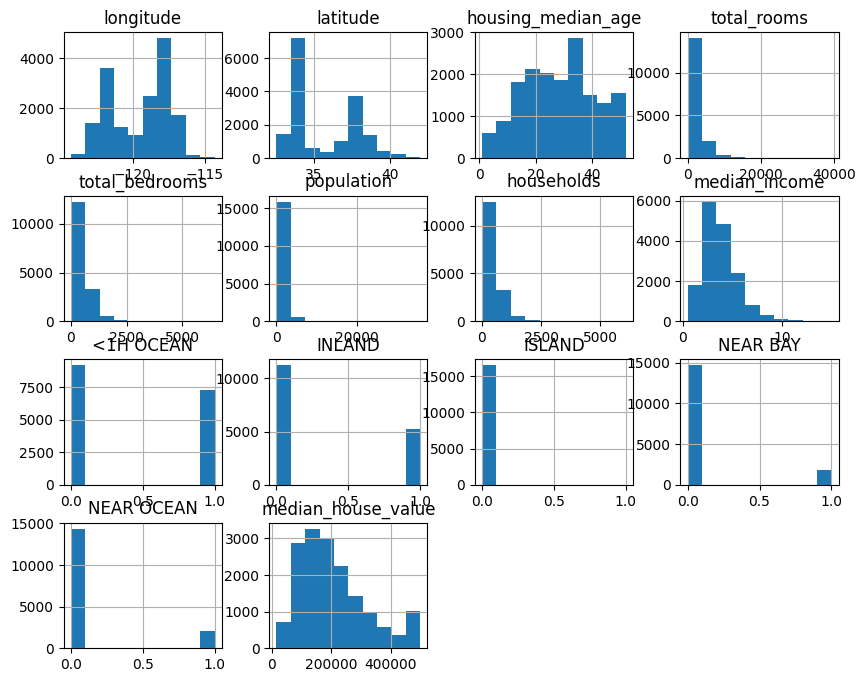

In [102]:
train_data.hist(figsize=(10,8));

In [103]:
train_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
longitude,1.000000,-0.924450,-0.112785,0.044604,0.070849,0.099085,0.056246,-0.011675,0.323464,-0.056539,0.006430,-0.471886,0.039225,-0.047209
latitude,-0.924450,1.000000,0.015752,-0.036280,-0.068375,-0.107337,-0.072174,-0.083424,-0.449530,0.352757,-0.011613,0.356215,-0.156471,-0.144191
housing_median_age,-0.112785,0.015752,1.000000,-0.356137,-0.316934,-0.292094,-0.300166,-0.118985,0.042582,-0.232234,0.010429,0.254907,0.021882,0.104928
total_rooms,0.044604,-0.036280,-0.356137,1.000000,0.931045,0.857796,0.919229,0.197649,-0.006510,0.024090,-0.006030,-0.018777,-0.006157,0.133621
total_bedrooms,0.070849,-0.068375,-0.316934,0.931045,1.000000,0.875168,0.979111,-0.005189,0.015939,-0.008892,-0.004542,-0.015552,0.003416,0.050898
population,0.099085,-0.107337,-0.292094,0.857796,0.875168,1.000000,0.905545,0.009471,0.071796,-0.021486,-0.008103,-0.057172,-0.022928,-0.021891
households,0.056246,-0.072174,-0.300166,0.919229,0.979111,0.905545,1.000000,0.016526,0.040135,-0.041514,-0.007669,-0.005871,0.004003,0.067852
median_income,-0.011675,-0.083424,-0.118985,0.197649,-0.005189,0.009471,0.016526,1.000000,0.170627,-0.239105,-0.005059,0.055601,0.028087,0.687743
<1H OCEAN,0.323464,-0.449530,0.042582,-0.006510,0.015939,0.071796,0.040135,0.170627,1.000000,-0.609587,-0.009797,-0.312501,-0.342263,0.255669
INLAND,-0.056539,0.352757,-0.232234,0.024090,-0.008892,-0.021486,-0.041514,-0.239105,-0.609587,1.000000,-0.007538,-0.240450,-0.263350,-0.485733


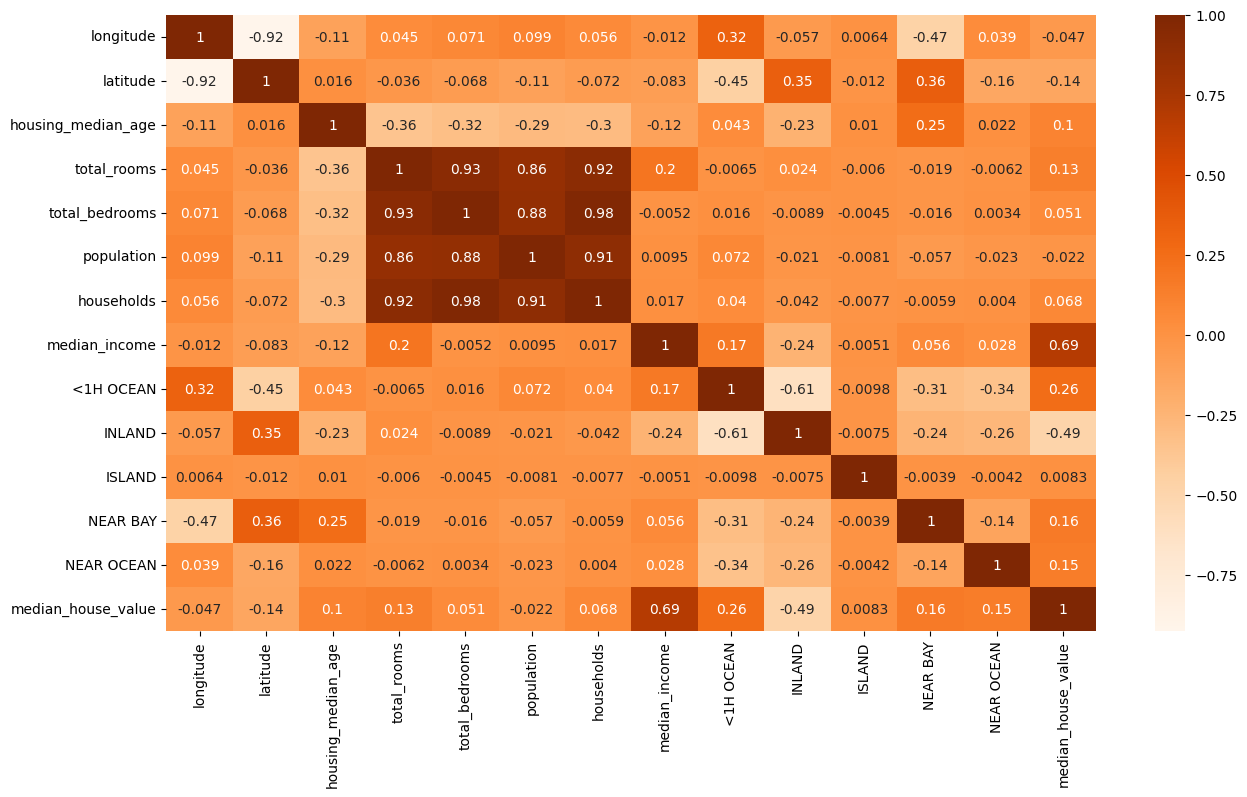

In [104]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="Oranges");

## **2| Data Preprocessing**

In [105]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

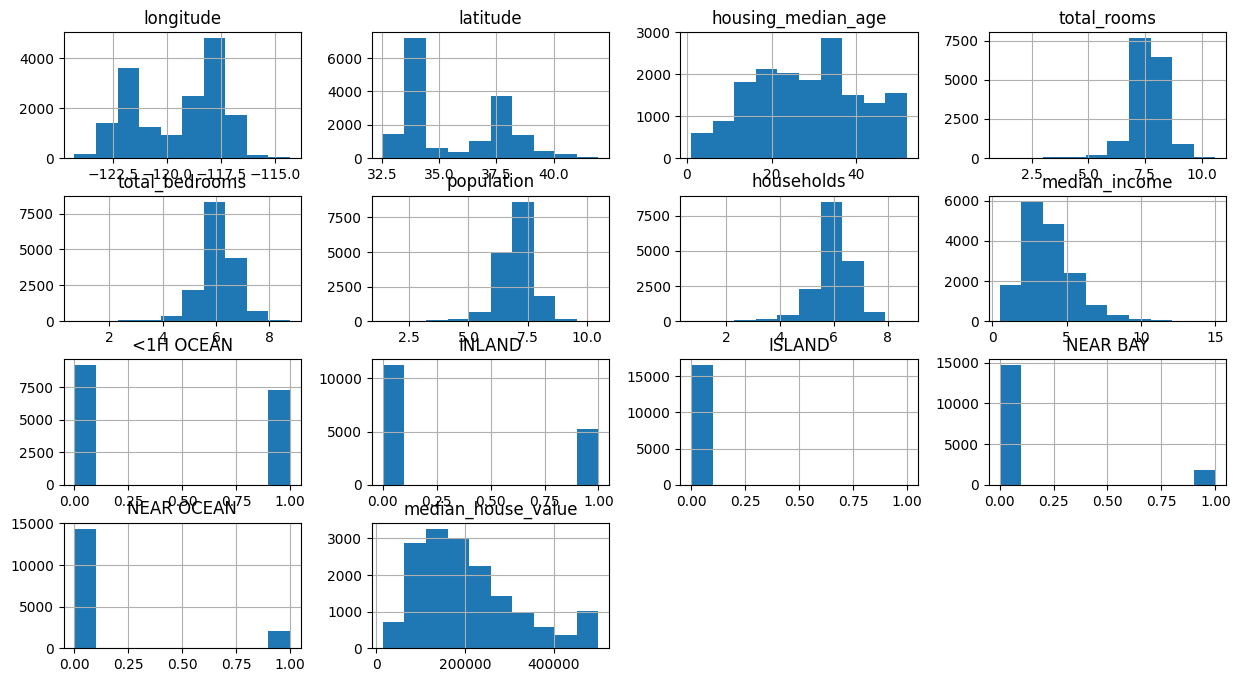

In [106]:
train_data.hist(figsize=(15,8));

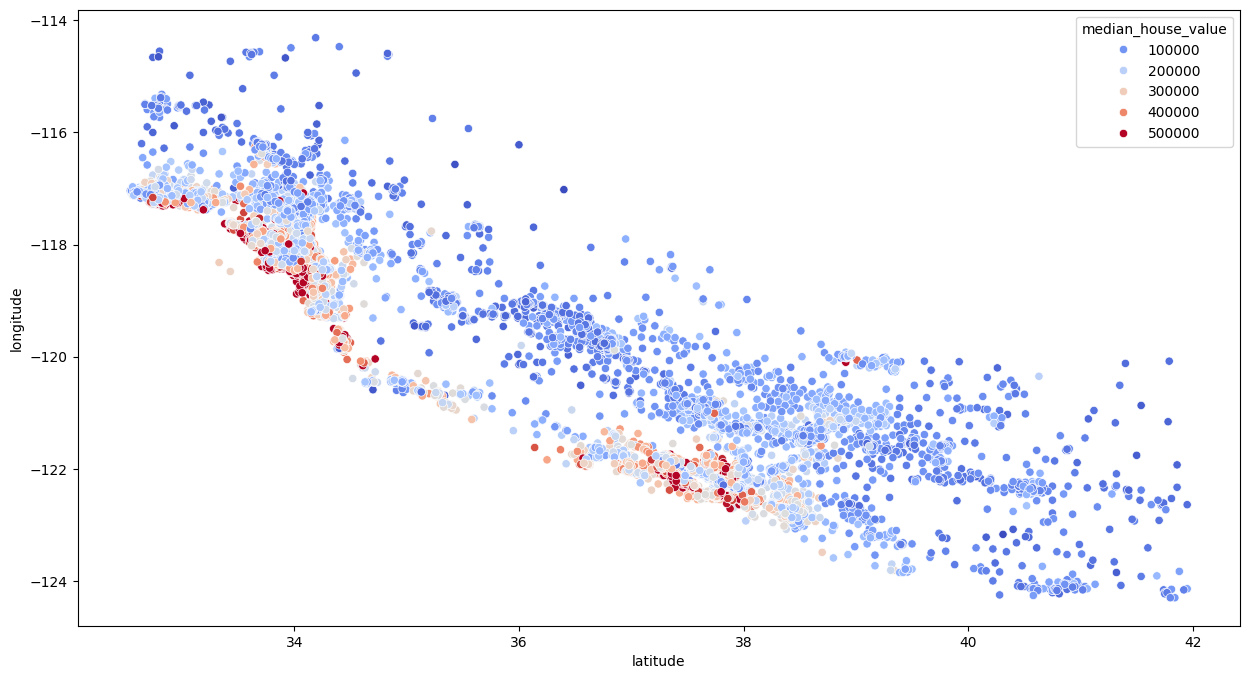

In [107]:
plt.figure(figsize = (15,8))
sns.scatterplot(data = train_data, x="latitude", y="longitude", hue="median_house_value", palette="coolwarm");

### **Feature Engineering**

In [108]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/train_data["households"]

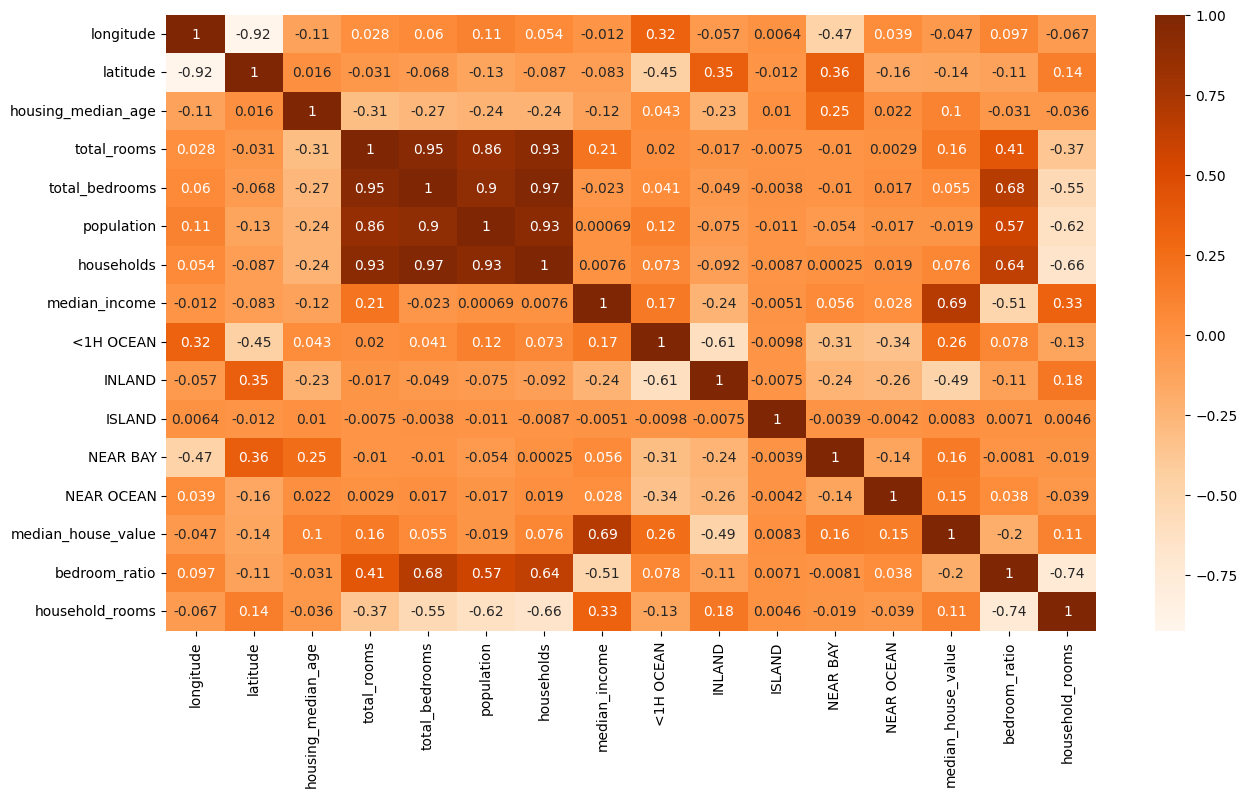

In [109]:
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="Oranges");

In [110]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17984,-121.94,37.30,25.0,1455.0,370.0,734.0,331.0,3.2727,1,0,0,0,0
3334,-122.65,38.92,30.0,70.0,38.0,20.0,13.0,4.1250,0,1,0,0,0
14082,-117.11,32.77,52.0,1484.0,224.0,498.0,223.0,6.6053,0,0,0,0,1
12002,-117.59,33.91,7.0,10223.0,1491.0,5205.0,1509.0,5.4872,0,1,0,0,0
16805,-122.41,37.66,32.0,1385.0,356.0,1096.0,353.0,4.4750,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,-121.96,37.53,28.0,2949.0,529.0,1538.0,545.0,4.9615,1,0,0,0,0
19826,-119.48,36.54,28.0,2112.0,363.0,1011.0,335.0,4.2222,0,1,0,0,0
19369,-123.02,38.36,16.0,1496.0,298.0,778.0,284.0,3.8589,0,0,0,0,1
11506,-118.11,33.74,43.0,1222.0,303.0,565.0,309.0,4.8482,0,0,0,0,1


In [112]:
X_train.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17984,-121.94,37.30,25.0,7.283448,5.916202,6.599870,5.805135,3.2727,1,0,0,0,0,0.812280,1.254656
3334,-122.65,38.92,30.0,4.262680,3.663562,3.044522,2.639057,4.1250,0,1,0,0,0,0.859450,1.615228
14082,-117.11,32.77,52.0,7.303170,5.416100,6.212606,5.411646,6.6053,0,0,0,0,1,0.741610,1.349528
12002,-117.59,33.91,7.0,9.232493,7.307873,8.557567,7.319865,5.4872,0,1,0,0,0,0.791538,1.261293
16805,-122.41,37.66,32.0,7.234177,5.877736,7.000334,5.869297,4.4750,0,0,0,0,1,0.812495,1.232546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,-121.96,37.53,28.0,7.989560,6.272877,7.338888,6.302619,4.9615,1,0,0,0,0,0.785134,1.267657
19826,-119.48,36.54,28.0,7.655864,5.897154,6.919684,5.817111,4.2222,0,1,0,0,0,0.770279,1.316094
19369,-123.02,38.36,16.0,7.311218,5.700444,6.658011,5.652489,3.8589,0,0,0,0,1,0.779684,1.293451
11506,-118.11,33.74,43.0,7.109062,5.717028,6.338594,5.736572,4.8482,0,0,0,0,1,0.804189,1.239253
